# Приоритизация гипотез и анализ результатов A/B теста для интернет-магазина

## Описание проекта

Вместе с отделом маркетинга бал подготовлен список гипотез для увеличения выручки интернет-магазина.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Описание данных

### Данные для первой части

Файл `/datasets/hypothesis.csv`.
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части

Файл `/datasets/orders.csv`.
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`.
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach, Impact, Confidence, Effort`.

Задача
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

# Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

Задача
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## 1. Приоритизация гипотез

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# зададим ширину колонок для датасетов
pd.set_option('display.max_colwidth', 150)

In [2]:
# загрузим датасет с  гипотезами
hypothesis = pd.read_csv('datasets/hypothesis.csv')

hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
# изучим общую информацию о датасете
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


- Пропусков значений в датасете не имеется
- Типы данных приведены корректно
- Заголовки можно перевести в строчные

In [4]:
# переводим заголовки в строчные
hypothesis.columns = hypothesis.columns.str.lower()

Изучим список имеющихся гипотез. Выведем колонку `hypothesis`.

In [5]:
for index, title in enumerate(list(hypothesis['hypothesis'])):
    print('{}. {}'.format(index, title))

0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1. Запустить собственную службу доставки, что сократит срок доставки заказов
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8. Запустить акцию, дающую скидку на товар в день рождения


Применим фреймворк `ICE` для приоретизации гипотез. Добавим колонку `ICE`, в которой рассчитаем значение  данного показателя для каждой гипотезы.

In [6]:
# приоретизация по фреймворку 'ICE'
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По методологии `ICE` наиболее приоритетными являются гипотезы сс индексами `8, 0, 7`.

Применим методолгоию `RICE` для оценки приоритетов гипотез.

In [7]:
# приоретизация по фреймворку 'RICE'
hypothesis['RICE'] = round(
    hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] 
    / hypothesis['efforts']
    , 2)

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По методологии `RICE` наиболее приоритетными являются гипотезы сс индексами `7, 2, 0`.

### Выводы

Мы произвели приоритизацию гипотез по методолгии `ICE` и `RICE`. У нас получились следующие приоритеты:
- По методологии `ICE` перспективными являются гипотезы с индексом 8, 0, 7.
- По методологии `RICE` перспективными являются гипотезы с индексом 7, 2, 0.

Для обоих фреймворков в список перспективных гипотез попали гипотезы с индексом 0 и 7, но вес в обоих случаях они имеют различный. Подобные расхождения связаны с тем, что методология `ICE` не учитывает оценку параметра `Reach`, который отвечает за охват аудитории, на которую потенциально окажет влияние гипотеза.

## 2. Запуск и анализ A/B теста

In [8]:
# импортируем датасеты с результатами A/B теста

orders = pd.read_csv('datasets/orders.csv')
display(orders.head())

visitors = pd.read_csv('datasets/visitors.csv')
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# выведем общую информацию по таблице 'orders'
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# выведем общую информацию по таблице 'visitors'
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Данные в датасетах заполнены корректно. Осталось преобразовать типа данных для дат.

In [11]:
# Преобразуем тип данных для колонок с датами
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Для получения корректных результатов A/B теста необходимо убедиться, что у нас нет пользователей попавших в обе группы. Построим таблицу для пользователей, оказавшихся в обеих группах и выведем их количество из таблицы `orders`.

In [12]:
# выявляем пользователей, находящихся в обеих группах тестирования
visitorsInBothGroups = orders.groupby('visitorId', as_index=False).agg({'group': 'nunique'}).query('group > 1')

visitorsInBothGroups['visitorId'].count()

58

58 пользователей оказались в обеих группах одновременно. Для таких пользователей сложно будет определить какая из версий повлияла на их поведение. Лучше таких пользователей исключить из таблицы `orders`.

In [13]:
# убираем пользователей с двумя группами из основной таблицы
visitorsInBothGroups = list(visitorsInBothGroups['visitorId'])
orders = orders.query('~visitorId.isin(@visitorsInBothGroups)')

Посмотрим за какой период у нас имеются данные.

In [14]:
print('Дата начала тестирования:', orders['date'].dt.date.min())
print('Дата окончания тестирования:', orders['date'].dt.date.max())

Дата начала тестирования: 2019-08-01
Дата окончания тестирования: 2019-08-31


Тестирование проходило с 1 по 31 августа 2019 г.

Рассчитаем таблицы с кумулятивными данными для дальнейшего анализа.

In [15]:
# создадим таблицу с парой 'дата - группа'
datesGroups = orders[['date', 'group']].drop_duplicates()


# создадим таблицу с кумулятивными данными по продажам
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max',
        'transactionId': 'nunique',
        'visitorId': 'nunique',
        'revenue': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])


# создадим таблицу с кумулятивными данными по посетителям
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])


# объединим таблицы с кумулятивными данными в одну общую
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])


# переименуем колонки
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим график кумулятивной выручки по группам.

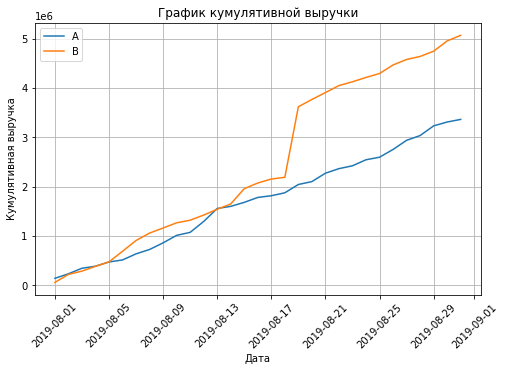

In [16]:
# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по группе A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# построим графики кумулятивной выручки для группы A
plt.figure(figsize=(8,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# построим графики кумулятивной выручки для группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.grid(True)

plt.show()

По кумулятивной выручке мы видим стабильный рост для обеих групп, что соответствует нашим ожиданиям.
Группа B показывает себя лучше: на отрезке с 1 по 18 число группа B незначительно опережает группу A, а с 19-го числа по группе B заметен резкий и практически 2-х кратный рост выручки, что вероятно может быть связано с аномалиями в виде очень дорогих заказов или же большого количества заказов. У группы A какого-либо резкого изменения показателя выручки не прослеживается.

Построим график кумулятивного среднего чека. Для этого поделим кумулятивную выручку на кумулятивное количество заказов.

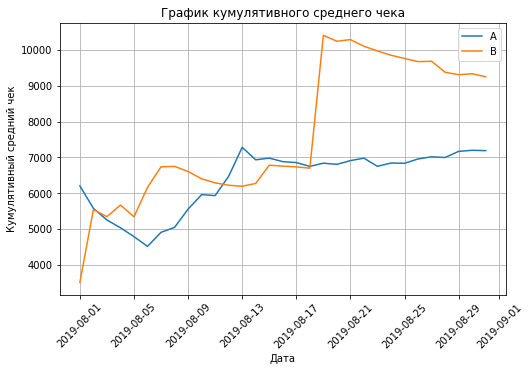

In [17]:
# построим графики среднего чека по группам
plt.figure(figsize=(8,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.grid(True)

plt.show()

Заметна тенденция к увеличению среднего чека для обеих групп. В основном средний чек по группе B выше. С 19 го числа видно резкое увеличение размера среднего чека. Вспоминая предыдущий график, можно связать резкое увеличение с одним или несколькими крупными заказами за этот день для группы B. После резкого увеличения средний чек по группе B начинает постепенно уменьшаться, но при этом остается на уровне в 1,5 раза превышающем уровень среднего чека для группы A.
Средний чек для группы A в районе 6-го числа начинает быстро расти и в районе 13-го числа даже опережает уровень среднего чека для группы B, после чего фиксируется на одном уровне.

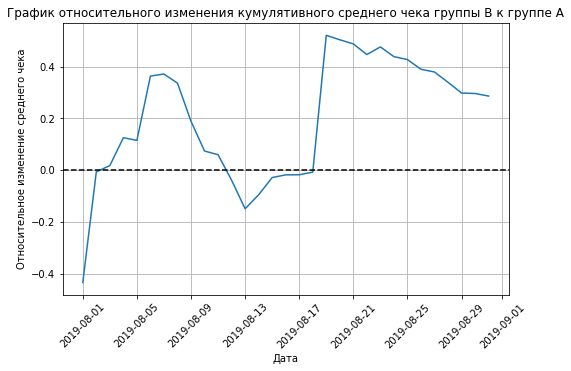

In [18]:
# объединим данные по выручкам групп в общий датафрейм
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построим график относительного изменения кумулятивного среднего чека
plt.figure(figsize=(8,5))

plt.plot(mergedCumulativeRevenue['date'], ((mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) 
                                           / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) 
                                           - 1))

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')
plt.grid(True)

plt.show()

Практически на протяжении всего анализируемого периода мы видим превосходство группы B по отношению к группе A. В районе 13-го числа заметен спад среднего чека для группы B. Ближе к концу периода лидирует средний чек группы B со значительным отрывом, после чего размер среднего чека начинает падать, не установившись на одном уровне.

Построим график кумулятивной конверсии.

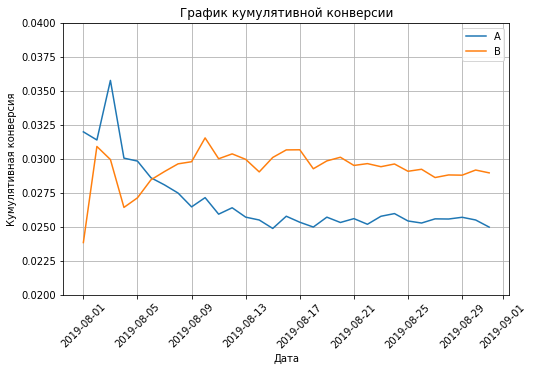

In [19]:
# рассчитаем конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# создадим датафрейм по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# создадим датафрейм по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# выведеим графики кумулятивных конверсий
plt.figure(figsize=(8, 5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xticks(rotation=45)
plt.ylim([0.02, 0.04])
plt.title('График кумулятивной конверсии')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.grid(True)

plt.show()

В первые дни конверсия группы A была выше, но с 5-го числа конверсия по группе B  вырвалась в лидеры, а конверсия по группе A стала снижаться. Ближе к концу месяца конверсии стабилизировались у обеих групп, в районе 34% для группы B и 30% для группы A.

Построим графики относительного изменения конверсии.

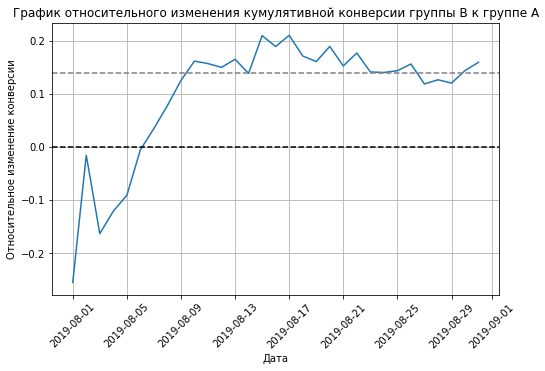

In [20]:
mergedCumulativeConversions = (
    cumulativeDataA[['date', 'conversion']].merge(
        cumulativeDataB[['date', 'conversion']],
        left_on='date',
        right_on='date',
        how='left',
        suffixes=['A', 'B'])
)
    
plt.figure(figsize=(8, 5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / 
         mergedCumulativeConversions['conversionA'] - 1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение конверсии')
plt.grid(True)

plt.show()

В начале теста группа A давала большую конверсию, но после 5-го дня конверсия группы B стала лидировать до конца теста и практически зафиксировалась на одном уровне.

По первым графикам видно, что показатели группы B кажутся лучше показателей группы A. При этом имеется явное воздействие некого фактора на резкое увеличение кумулятивной выручки и среднего чека по группе B. Сильные аномалии могут искажать кумулятивный эффект показателей. Изучим распределения для выявления возможных аномалий. Построим гистограмму по количеству заказов.

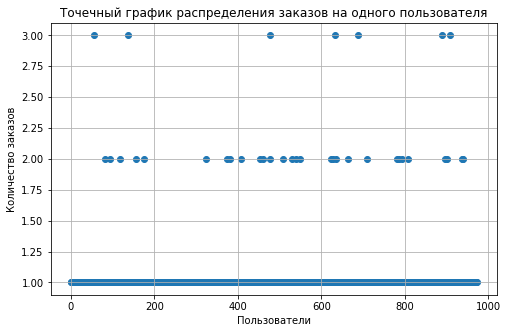

In [21]:
# строим точечную диаграмму количества заказов на одного пользователя
ordersByUsers = orders.groupby('visitorId').agg({'transactionId': 'nunique'})

x_values = pd.Series(range(0, len(ordersByUsers['transactionId'])))

plt.figure(figsize=(8, 5))
plt.scatter(x_values, ordersByUsers['transactionId'])

plt.title('Точечный график распределения заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid(True)

plt.show()

На графике видно, что пользователей совершивших более 2-х заказов мало и они редкие. Посчитаем 95 и 99 перцентили, чтобы точнее определить границы выбросов.

In [22]:
# считаем 95 и 99 перцентили
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([1., 2.])

Менее 5% пользователей делало более 1-го заказа и менее 1% пользователей делало более 2-х заказов.  
В качестве ограничения выберем пользователей, которые делали более 2-х заказов.

In [23]:
# сохраним значение в переменную
bottomOrders = np.percentile(ordersByUsers['transactionId'], [99])[0]

Изучим распределение выручки. Построим гистограмму по выручке.

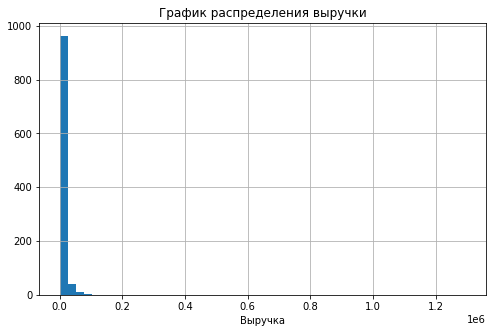

In [24]:
# строим гистограмму по выручке
plt.figure(figsize=(8, 5))

plt.hist(orders['revenue'], bins=50)

plt.title('График распределения выручки')
plt.xlabel('Выручка')
plt.grid(True)

plt.show()

Стоимость большинства заказов не превышает 200 000. Построим точечную диаграмму, чтобы суметь определить имелись ли выбросы в данных.

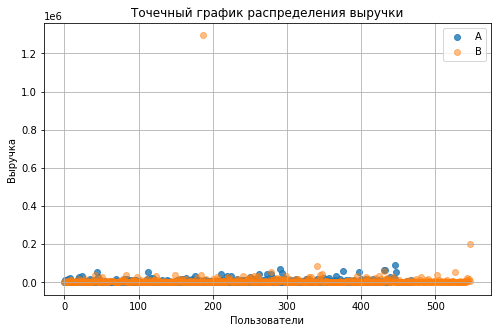

In [25]:
# строим точечную диаграмму выручки для каждой группы
x_valuesA = pd.Series(range(0, len(orders[orders['group'] == 'A']['revenue'])))
x_valuesB = pd.Series(range(0, len(orders[orders['group'] == 'B']['revenue'])))

plt.figure(figsize=(8, 5))

plt.scatter(x_valuesA, orders[orders['group'] == 'A']['revenue'], alpha=.8, label='A')
plt.scatter(x_valuesB, orders[orders['group'] == 'B']['revenue'], alpha=.5, label='B')

plt.title('Точечный график распределения выручки')
plt.legend()
plt.xlabel('Пользователи')
plt.ylabel('Выручка')
plt.grid(True)

plt.show()

На точечной диаграмме мы нашли 2 выброса: в районе 200 000 и в районе 1 400 000. Оба выброса относятся к покупателям из группы B.  
Посчитаем 95 и 99 перцентили.

In [26]:
# считаем 95 и 99 перцентили
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Менее 5% заказов дороже 26 785 и менее 1% заказов дороже 53 904.  
Построим еще раз точечный график, но с другим масштабом, чтобы лучше понять какую нижнюю границу аномалий выбрать.

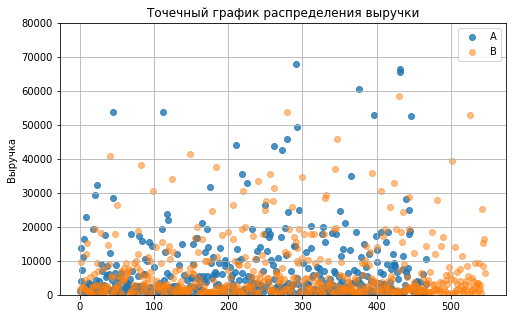

In [27]:
# строим точечную диаграмму выручки для каждой группы
x_valuesA = pd.Series(range(0, len(orders[orders['group'] == 'A']['revenue'])))
x_valuesB = pd.Series(range(0, len(orders[orders['group'] == 'B']['revenue'])))

plt.figure(figsize=(8, 5))

plt.scatter(x_valuesA, orders[orders['group'] == 'A']['revenue'], alpha=.8, label='A')
plt.scatter(x_valuesB, orders[orders['group'] == 'B']['revenue'], alpha=.5, label='B')

plt.ylim(0, 80000)
plt.title('Точечный график распределения выручки')
plt.legend()
plt.ylabel('Выручка')
plt.grid(True)

plt.show()

На графике видно, что у нас много заказов попадает в 95% выборки. Примем за нижнюю границу аномальных заказов значение 99 перцентиля в 53904, чтобы не срезать слишком много полезной информации. От самых сильных выбросов мы в любом случае избавимся.

In [28]:
# сохраним значение нижней границы в переменную
bottomRevenue = np.percentile(orders['revenue'], [99])[0]

Посчитаем статистическую значимость различия в конверсии между группами. Создадим переменные сгруппированные по пользователям и количеством заказов по каждому из пользователей.

Сформулируем нулевую и альтернативную гипотезы:  
**нулевая гипотеза** $H_0$: Между группами нет различий по конверсии  
**альтернативная гипотеза** $H_1$: Между группами имеются различия по конверсии

In [29]:
# создадим переменные с данными о покупателях и количестве заказов оформленных покупателями
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders']


# создадим переменные в которых будет количество заказов для каждого покупателя
# и 0 для посетителей, которые не совершили ни одного заказа
sampleA = pd.concat([ordersByUsersA['orders'], 
                    pd.Series(0, index=np.arange(
                        visitors[visitors['group'] == 'A']['visitors'].sum() 
                        - len(ordersByUsersA)
                    ))],
                    axis=0
                   )

sampleB = pd.concat([ordersByUsersB['orders'], 
                    pd.Series(0, index=np.arange(
                        visitors[visitors['group'] == 'B']['visitors'].sum() 
                        - len(ordersByUsersB)
                    ))],
                    axis=0
                   )

# Рассчитаем p-value и относительный прирост по "сырым" данным
alpha = .5

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


P-value оказался меньше 0.05, соответственно, мы отвергаем нулевую гипотезу об отсутствии различий в конверсии между группами по "сырым" данным.  
Относительный прирост у группы B на 16% больше, чем у группы A.

Проверим статистическую значимость различий в среднем чеке между группами и посчитаем относительный прирост среднего чека.

Сформулируем нулевую и альтернативную гипотезы:  
**нулевая гипотеза** $H_0$: Между группами нет различий по среднему чеку  
**альтернативная гипотеза** $H_1$: Между группами имеются различия по среднему чеку

In [30]:
# Рассчитаем p-value и относительный прирост по "сырым" данным
alpha = .5

print("{0:.3f}".format(stats.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'], 
    orders[orders['group'] == 'B']['revenue'])[1]))

print("{0:.3f}".format(
    orders[orders['group'] == 'B']['revenue'].mean() 
    / orders[orders['group'] == 'A']['revenue'].mean() - 1))

0.829
0.287


P-value больше 0.05, причин отвергать нулевую гипотезу нет, то есть между группами нет статистически значимых различий по среднему чеку.  
Второй показатель указывает, на то что группа B дала больший результат по среднему чеку на 28.7%

Исходя из полученных ранее ограничений создадим таблицу с аномальными покупателями, которые либо делали более 2 заказов, либо делали покупки на сумму более 53904.

In [31]:
usersWithManyOrders = pd.concat([
    ordersByUsersA[ordersByUsersA['orders'] >= bottomOrders]['userId'],
    ordersByUsersB[ordersByUsersB['orders'] >= bottomOrders]['userId']
], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > bottomRevenue]['visitorId']
usersWithExpensiveOrders.columns = ['userId']

abnormalUsers = pd.concat([
    usersWithManyOrders,
    usersWithExpensiveOrders
], axis=0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
dtype: int64
45


У нас получился список из 45 аномальных покупателей. Проведем снова проверку статистической значимости конверсии, но без учета аномальных покупателей.

Сформулируем нулевую и альтернативную гипотезы:  
**нулевая гипотеза** $H_0$: Между группами нет различий по конверсии  
**альтернативная гипотеза** $H_1$: Между группами имеются различия по конверсии

In [32]:
# создадим переменные в которых будет количество заказов для каждого покупателя
# и 0 для посетителей, которые не совершили ни одного заказа
sampleAFiltered = pd.concat([ordersByUsersA[
                        np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
                    ]['orders'], 
                    pd.Series(0, index=np.arange(
                        visitors[visitors['group'] == 'A']['visitors'].sum() 
                        - len(ordersByUsersA)
                    ))],
                    axis=0
                   )

sampleBFiltered = pd.concat([ordersByUsersB[
    np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
]['orders'], 
                    pd.Series(0, index=np.arange(
                        visitors[visitors['group'] == 'B']['visitors'].sum() 
                        - len(ordersByUsersB)
                    ))],
                    axis=0
                   )

# Рассчитаем p-value и относительный прирост по "сырым" данным
alpha = .5

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.008
0.188


P-value оказался снова ниже 0.5, что говорит о том, что статистически значимые различия присутствуют в конверсии между группами.  
Относительный прирост конверсии для группы B увеличился до уровня в 18.8%

Проверим статистическую значимость по средним чекам между группами без учета аномальных покупателей.

Сформулируем нулевую и альтернативную гипотезы:  
**нулевая гипотеза** $H_0$: Между группами нет различий по среднему чеку  
**альтернативная гипотеза** $H_1$: Между группами имеются различия по среднему чеку

In [33]:
# Рассчитаем p-value и относительный прирост по "сырым" данным
alpha = .5

print("{0:.3f}".format(stats.mannwhitneyu(
    orders[
    np.logical_and(orders['group'] == 'A',
      np.logical_not(orders['visitorId'].isin(abnormalUsers)))
    ]['revenue'], 
    orders[
    np.logical_and(orders['group'] == 'B',
      np.logical_not(orders['visitorId'].isin(abnormalUsers)))
    ]['revenue'])[1]))

print("{0:.3f}".format(
    orders[
    np.logical_and(orders['group'] == 'B',
       np.logical_not(orders['visitorId'].isin(abnormalUsers)))
    ]['revenue'].mean() 
    / orders[
        np.logical_and(orders['group'] == 'A',
             np.logical_not(orders['visitorId'].isin(abnormalUsers)))
        ]['revenue'].mean() - 1))

0.969
0.002


P-value увеличился, а разница между сегментами сильно изменилась. После исключения аномальных пользователей средний чек по группе B оказался незначительно выше, в сравнении с группой A, на 0.2%

## Общие выводы

В ходе анализа результатов A/B теста мы получили следующие результаты:
- Есть статистически значимые различия по конверсии как по "сырым", так и  по "очищенным" данным;
- Нет статистически значимого различия по среднему чеку как по "сырым", так и по данным после фильтрации аномалий;
- График относительного изменения конверсии говорит о том, что конверсия группы B стабильно лучше и отсутствует какая-либо тенденция к ухудшению;
- График относительного изменения среднего чека показывал хорошие уровни среднего чека для группы B, но на средний чек сказывались аномалии в виде нескольких очень дорогих заказов;
- Показатель прироста среднего чека говорит о том, что средний чек по "очищенным" данным по группе B незначительно выше на 0.2%, чем по группе A.

Исходя из полученных данных тест следует остановить и признать наличие улучшений по группе B. Результаты показывают статистически значимое увеличение конверсии среди посетителей группы B на 18.8% и отсутствие статистически значимых изменений по среднему чеку покупателей. 